# 图像分类数据集

### 如何读取多类分类问题数据集

**MNIST数据集是图像分类中广泛使用分数据集之一，但作为基准数据集过于简单。
我们使用更复杂的 Fashion-MNIST数据集**

In [56]:
%matplotlib inline

import torch
import torchvision
import matplotlib.pyplot as plt

from torch.utils import data
from torchvision import transforms

from d2l import torch as d2l

from IPython import display

d2l.use_svg_display()  # svg 显示图片

### 使用框架自带的内置函数Fashion-MNIST数据集下载并读取到内存

In [2]:
# 通过ToTensor() Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor 将图像数据从PIL类型转换到32位浮点数类型
# 并除以255，使得像素数值都在0和1之间

trans = transforms.ToTensor()

# train = True 下载的是训练数据集
# transform = trans 下载下来图片转为tensor。默认为PIL.Image类型
# download = True 从网络下载
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)


# 测试集，不用于训练，只⽤于评估模型性能
mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=True)

print(len(mnist_train))
print(len(mnist_test))

60000
10000


/home/fanzone/.cache/pypoetry/virtualenvs/dive-into-deep-learning-d-sgt5Pk-py3.9/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [18]:
mnist_train[0][0].shape  # 第一个[0]是个元组，元组的第一个元素为图像tensor，第二个为对应类别索引。

torch.Size([1, 28, 28])

### 定义两个可视化数据集的函数

In [3]:
def get_fashion_minist_labels(labels):
    """返回fashion mnish 数据集的文本标签"""
    
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneakers',
        'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in labels ]

In [4]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """使用matplotlib 绘制 plot a list of images"""
    
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)  # 隐藏坐标轴
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

### 几个样本的图像及其相应的标签

torch.Size([18, 1, 28, 28])
torch.Size([18])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0])


array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneakers'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneakers'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

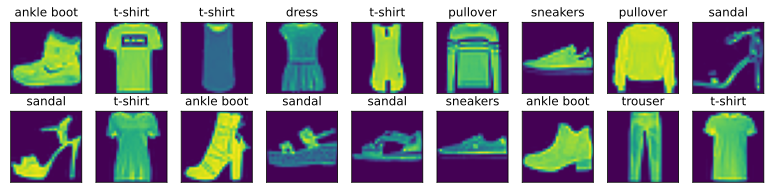

In [5]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))  # 大小为18的固定样本
print(X.shape)
print(y.shape)
print(y)

show_images(X.reshape(18,28,28), 2, 9, titles=get_fashion_minist_labels(y))

### 读取小批量数据，大小为batch_size

In [8]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程来读取数据"""
    
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

timer = d2l.Timer()

for X, y in train_iter:
    continue

print(f'{timer.stop():.2f} second')

1.02 second


### 定义load_data_fashion_mnist函数

In [6]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载 Fashion-MNIST 数据集 ，然后加载到内存"""
    
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))  # resize 用于调整图像的大小。将图片变得更大
    trans = transforms.Compose(trans)
    
    mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)

    mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=True)
    
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test, batch_size, shuffle=True, num_workers=get_dataloader_workers())
           )

In [98]:
load_data_fashion_mnist(256)

(<torch.utils.data.dataloader.DataLoader at 0x1a91a9e0070>,
 <torch.utils.data.dataloader.DataLoader at 0x1a916e6f7f0>)

In [99]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


#  Softmax回归实现

In [9]:
import torch

from d2l import torch as d2l

batch_size = 256

train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [186]:
xxx = next(iter(test_iter))
print(xxx)
print(xxx[0].shape)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

### 定义W和b

In [10]:
num_inputs = 784  # 对28*28 的图片展平，将它们视为长度为28 * 28 = 784的向量

num_outputs = 10  # 因为我们数据集有10个类别，所以网络输出维度为10

# 图片为长28，宽28
# 对于softmax来说，输入需要为一向量
# 因为我们的数据集有10个类别，所以⽹络输出维度为10。因此，权重将构成⼀个784 x 10的矩阵，偏置将构成⼀个1 x 10的⾏向量。与线性回归⼀样，我们将使
# ⽤正态分布初始化我们的权重W，偏置初始化为0。
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

print(W, b)

tensor([[ 0.0059, -0.0143, -0.0118,  ..., -0.0088, -0.0148, -0.0053],
        [ 0.0122, -0.0085, -0.0035,  ..., -0.0037,  0.0062, -0.0114],
        [ 0.0011,  0.0090, -0.0051,  ..., -0.0031, -0.0036, -0.0066],
        ...,
        [ 0.0037,  0.0082,  0.0005,  ..., -0.0009,  0.0054,  0.0044],
        [-0.0074, -0.0067, -0.0055,  ..., -0.0030, -0.0176,  0.0039],
        [-0.0015, -0.0054,  0.0276,  ..., -0.0046,  0.0081,  0.0048]],
       requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


### 给定一个矩阵`X`，我们可以对所有元素求和

In [11]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(X)
print(X.sum(0, keepdim=True))  # keepdim 为2维
print(X.sum(1, keepdim=True))  # 2维

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[5., 7., 9.]])
tensor([[ 6.],
        [15.]])


### sotfmax原理

softmax步骤： <br/>
1） 对每一项取 幂 exp

2）对每一行求和（小批量中**每个样本，[[], []], 其中一个[]为一个样本**是一行），得到每个样本的归一化常数

3）将每一行除以归一化常数，确保结果的和为1

**公式：**
 softmax(X<sub>ij</sub>) = exp(X<sub>ij</sub>) / 求和 exp(X<sub>ij</sub>)
 
 **问题：**
 这个只利用数学定义实现的softmax存在问题：因为指数函数非线性增大，如计算exp(50)，结果值就会变得非常大，难以维护数值稳定性

In [12]:
def softmax(x):
    X_exp = torch.exp(x)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

### 验证一下softmax运算会将其变为非负数，且每行和为1。

In [17]:
X = torch.normal(0, 1, size=(2,5))
print('X: ', X)
X_prob = softmax(X)
X_prob, X_prob.sum(1)

X:  tensor([[ 0.5191,  0.9723, -0.3856, -1.0163, -0.1703],
        [ 0.0184, -0.9634,  1.7278,  1.7070, -1.3280]])


(tensor([[0.2706, 0.4258, 0.1095, 0.0583, 0.1358],
         [0.0795, 0.0298, 0.4395, 0.4305, 0.0207]]),
 tensor([1., 1.]))

### 定义模型

使⽤reshape函数将每张原始图像展平为向量

W的shape为 784 * 10

In [18]:
def net(X):
    # print(X.shape, "...net...")
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

### 定义损失函数

创建一个数据`y_hat`, 其中包含2个样本在3个类别的预测概率， 使用`y`作为`y_hat`中概率的索引。

In [19]:
y = torch.tensor([0, 2])

# y_hat 为两个样本，3个类别的概率
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])

# 拿出0号样本第0个类别的概率。 拿出第1号样本第2个类别的概率。
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

**实现交叉熵损失函数**

In [32]:
def cross_entropy(y_hat, y):
    # print(y_hat)
    # print(y)
    return -torch.log(y_hat[range(len(y_hat)), y])  # ? 为啥取一段

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

### 定义分类准确率函数

准确率： 分类准确率即正确预测数量与总预测数量之⽐。

为了计算准确率，我们执⾏以下操作。⾸先，如果y_hat是矩阵，那么假定第⼆个维度存储每个类的预测分
数。我们使⽤argmax获得每⾏中最⼤元素的索引来获得预测类别。

然后我们将预测类别与真实y元素进⾏⽐
较。由于等式运算符“==”对数据类型很敏感，因此我们将y_hat的数据类型转换为与y的数据类型⼀致。结
果是⼀个包含0（错）和1（对）的张量。进⾏求和会得到正确预测的数量。

In [22]:
print(y_hat)
y_hat.argmax(axis=0)   # 第一列的，1，第二列的0，第三列的0

y_hat.argmax(axis=1)  # 第0行的最大值的索引2， 第1行，最大值索引2

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])


tensor([2, 2])

In [23]:
y_hat1 = y_hat.argmax(axis=1)
cmp = y_hat1.type(y.dtype) == y
float(cmp.type(y.dtype).sum()) / len(y)

0.5

In [24]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    
    # 判断是否为矩阵
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        
        # 获取每行中的最大元素的下标， 为预测类别
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

**对于任意数据迭代器data_iter可访问的数据集，我们可以评估在任意模型net的准确率** 

In [25]:
def evaluate_accuracy(net, data_iter):
    """计算在制定数据集上模型的精度"""
    
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式。 不要计算梯度了，

    metric = Accumulator(2)  # 正确预测数，预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())  # 准确率， 样本数
    # print(metric.data)
    return metric[0] / metric[1]  # 分类正确的样本数 / 总样本数

**`Accumulator`实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量**

In [26]:
class Accumulator:
    """n个变量上累加"""
    
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        # print(args, ".....accumulator ....")
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

evaluate_accuracy(net, test_iter)

0.0963

### 模型训练

In [27]:
def train_epoch_ch3(net, train_iter, loss, updater):  # ch3为第三章
    """训练模型一个迭代周期"""
    
    if isinstance(net, torch.nn.Module):
        net.train()  # 将模型设置为训练模式。 要计算梯度
    
    # 训练损失总和，训练准确度总和，样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度，并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        
        if isinstance(updater, torch.optim.Optimizer):
            # 使用Pytorch内置的优化器和损失函数
            updater.zero_grad()
            l.backward()  # 计算梯度
            updater.step()  # update 参数
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
        else:
            # 使用自己实现的优化器和损失函数
            l.sum().backward()  # 求和，算梯度
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    
    # 返回训练损失和训练准确率
    return metric[0] / metric[2], metric[1] / metric[2]
    
    

**定义Animator类，绘制数据**

In [57]:
class Animator:
    """在动画中绘制数据"""
    
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None,\
                 xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'),\
                 nrows=1, ncols=1, index=1, figsize=(3.5, 3.5)):
        # 增量的绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        
        print(nrows, ncols)
        self.fig = plt.figure(figsize=figsize)
        self.axes = plt.subplot(nrows, ncols, 1)
        
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    
    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)        


In [29]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
    
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc, ))
    
    train_loss, train_acc = train_metrics
    
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [31]:
lr = 0.1  # 学习率

def updater(batch_size):
    return d2l.sgd([W,b], lr, batch_size)

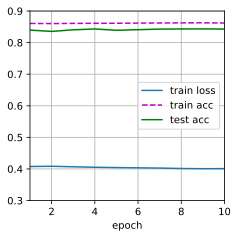

In [58]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 模型预测

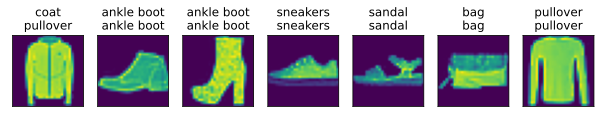

In [63]:
def predict_ch3(net, test_iter, n=6):
    """预测模型"""
    
    for X, y in test_iter:
        break
    trues = get_fashion_minist_labels(y)
    preds = get_fashion_minist_labels(net(X).argmax(axis=1))
    
    titles = [true + "\n" + pred for true, pred in zip(trues, preds)]
    
    show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter, n=7)

## Softmax 简洁实现

In [222]:
import torch
from torch import nn

from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

### 初始化模型参数

In [223]:
#  Pytorch不会隐式的调整输入的形状
# 因此，我们定义了展平层（flatten） 在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

 ### 在交叉熵损失函数中传递未归一化的预测，并计算softmax及其对数

In [224]:
loss = nn.CrossEntropyLoss()

### 使用学习率为0.1 的小批量随机梯度下降作为优化算法

In [225]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

### 调用之前定义的训练函数来训练模型

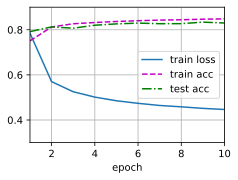

In [226]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)